In [32]:
import torch

testset = torch.load('../RNA_design/data/testset.pt')
file_to_seq_map = {dt['id_list'][0]: seq for seq, dt in testset.items()}
seq_to_file_map = {seq: dt['id_list'][0] for seq, dt in testset.items()}

In [14]:
import numpy as np
def recovery_rate(ref_seq, tar_seq_list):
    assert len(ref_seq) == len(tar_seq_list[0]), "Two sequences must be the same length."

    recovery_arr = np.zeros((len(tar_seq_list), len(ref_seq)))
    cnt = 0
    for tar_seq_idx, tar_seq in enumerate(tar_seq_list):
        for i in range(len(ref_seq)):
            if ref_seq[i] == tar_seq[i]:
                recovery_arr[tar_seq_idx][i] = 1
    
    return recovery_arr, recovery_arr.mean(), recovery_arr.mean(axis=1)

In [67]:
import os

results = {}
for file_id in os.listdir('sequence_designs_x3dna'):
    print('milet', file_id)
    with open(f'sequence_designs_x3dna/{file_id}', 'r') as f:
        seq_list = [line.split(' ')[0] for line in f]

    ref_seq = file_to_seq_map[file_id[:-4]]
    results[ref_seq] = {
        'seq': ref_seq,
        'predicted_seq': seq_list
    }

    recovery_array, recovery_rate_avg, recovery_rate_per_sample = recovery_rate(ref_seq, seq_list)
    results[ref_seq]['recovery_list'] = recovery_array
    results[ref_seq]['recovery_avg'] = recovery_rate_avg
    results[ref_seq]['recovery_avg_per_sample'] = recovery_rate_per_sample

milet 5MLC_1_C.txt
milet 5EL5_1_3L.txt
milet 4V7L_1_BB.txt
milet 2ZH2_1_B.txt
milet 7ZAG_1_4.txt
milet 4WRA_1_2K.txt
milet 4K4Z_1_F-G-H.txt
milet 6IV9_1_B.txt
milet 3JBU_1_v.txt
milet 5GAM_1_U.txt
milet 2R1S_1_A-B.txt
milet 8BVM_1_u.txt
milet 3NPQ_1_B.txt
milet 6JE9_1_B.txt
milet 6C8D_1_A-B.txt
milet 3JCM_1_E.txt
milet 4V4P_1_AB.txt
milet 7QCA_1_L70.txt
milet 7PO2_1_5.txt
milet 7WAY_1_D.txt
milet 4YYE_1_C.txt
milet 2QWY_1_A.txt
milet 6LVR_1_B.txt
milet 3DW4_1_A.txt
milet 1H4Q_1_T.txt
milet 8GKH_1_W.txt
milet 6D8O_1_A.txt
milet 2QUX_1_C.txt
milet 6YWE_1_bb.txt
milet 4V6Y_1_A1.txt
milet 7WJU_1_C.txt
milet 6N5O_1_A.txt
milet 2V3C_1_M.txt
milet 2IZM_1_R.txt
milet 5W0O_1_C-D.txt
milet 6LAX_1_A.txt
milet 7OHT_1_3.txt
milet 7B3C_1_T-P.txt
milet 7PZY_1_10.txt
milet 7SYO_1_z.txt
milet 4K31_1_B-C.txt
milet 8H0S_1_X.txt
milet 1YLS_1_B.txt
milet 4OQU_1_A.txt


In [68]:
torch.save(results, 'vienna_x3dna_results.pt')

In [3]:
import torch

results = torch.load('vienna_results.pt')
results_2 = torch.load('vienna_x3dna_results.pt')
taro_res = torch.load('taro_results.pt')

## Recovery rate comparison

In [71]:
import pandas as pd

seq_list = []
vienna_list = []
grnade_list = []
for seq in results:
    if seq in taro_res:
        seq_list.append(seq)
        vienna_list.append(results[seq]['recovery_avg'])
        grnade_list.append(taro_res[seq]['recovery_avg'])

grnade_list, vienna_list = zip(*sorted(zip(grnade_list, vienna_list)))

data = {
    'id': list(range(len(seq_list))),
    'seq': seq_list,
    'vienna_rcv': vienna_list,
    'grnade_rcv': grnade_list
}
df = pd.DataFrame(data=data)

In [70]:
testset['GGAGUAGCGCAGCCCGGUAGCGCACCUCGUUCGGGACGAGGGGGGCGCUGGCAGAUCCAGUCUCC']['id_list'][0]

'1H4Q_1_T'

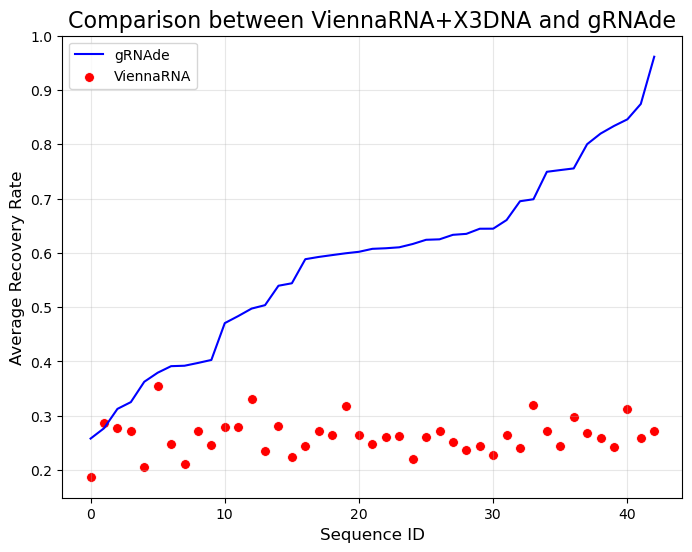

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(x="id", y="grnade_rcv", data=df, color="blue", label='gRNAde')
sns.scatterplot(x="id", y="vienna_rcv", data=df, color="red", s=50, label='ViennaRNA')
plt.title("Comparison between ViennaRNA+X3DNA and gRNAde", fontsize=16)
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("Average Recovery Rate", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## min, median, max

In [ ]:
import pandas as pd
from statistics import median

min_list = []
median_list = []
max_list = []
for seq in results:
    min_list.append(min(results[seq]['recovery_avg_per_sample']))
    median_list.append(median(results[seq]['recovery_avg_per_sample']))
    max_list.append(max(results[seq]['recovery_avg_per_sample']))



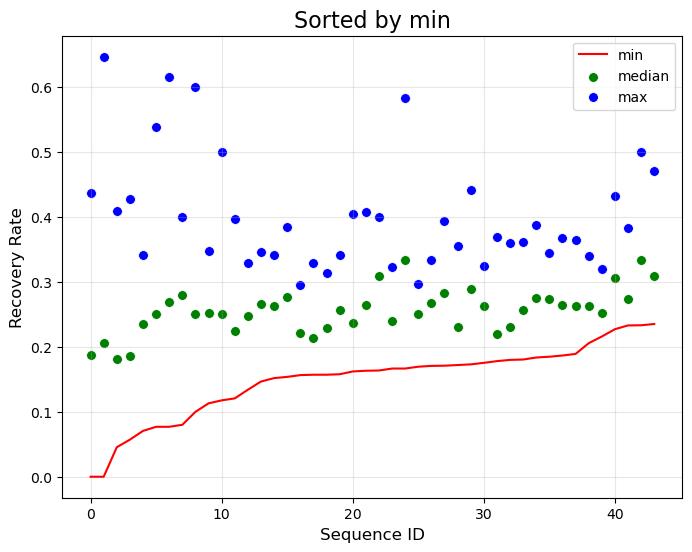

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

min_list, median_list, max_list = zip(*sorted(zip(min_list, median_list, max_list)))
data = {
    'id': list(range(len(min_list))),
    'min': min_list,
    'median': median_list,
    'max': max_list
}
df_min = pd.DataFrame(data=data)

plt.figure(figsize=(8, 6))
sns.lineplot(x="id", y="min", data=df_min, color="red", label='min')
sns.scatterplot(x="id", y="median", data=df_min, color="green", s=50, label='median')
sns.scatterplot(x="id", y="max", data=df_min, color="blue", s=50, label='max')
plt.title("Sorted by min", fontsize=16)
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("Recovery Rate", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

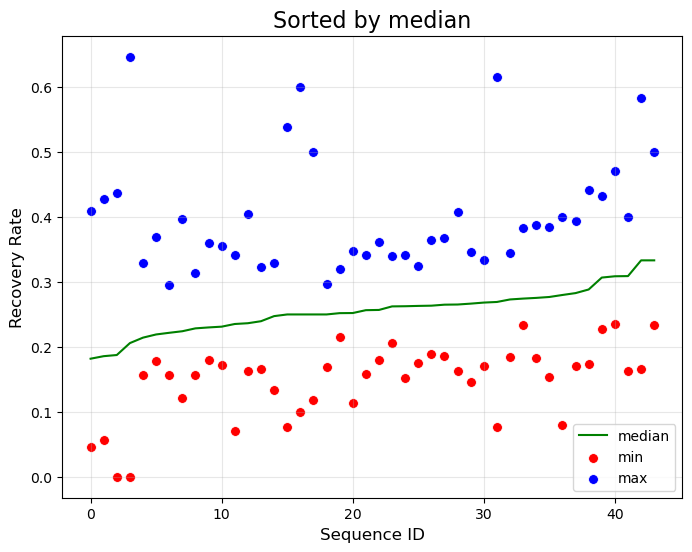

In [11]:
median_list, min_list, max_list = zip(*sorted(zip(median_list, min_list, max_list)))
data = {
    'id': list(range(len(min_list))),
    'min': min_list,
    'median': median_list,
    'max': max_list
}
df_min = pd.DataFrame(data=data)

plt.figure(figsize=(8, 6))
sns.lineplot(x="id", y="median", data=df_min, color="green", label='median')
sns.scatterplot(x="id", y="min", data=df_min, color="red", s=50, label='min')
sns.scatterplot(x="id", y="max", data=df_min, color="blue", s=50, label='max')
plt.title("Sorted by median", fontsize=16)
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("Recovery Rate", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

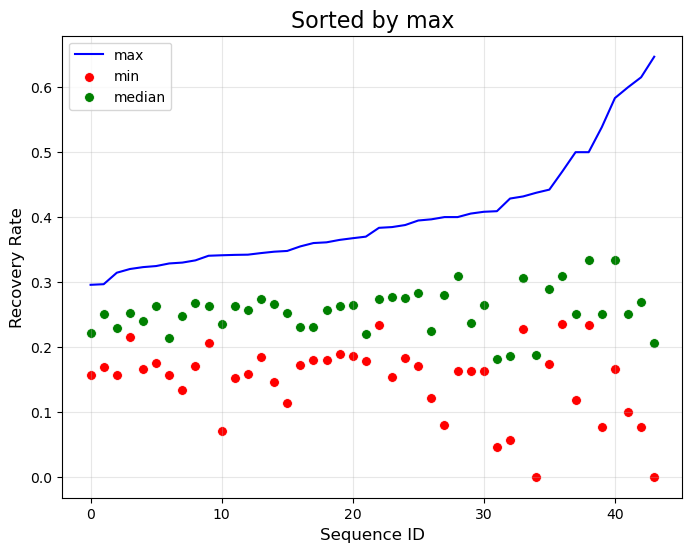

In [ ]:
max_list, median_list, min_list = zip(*sorted(zip(max_list, median_list, min_list)))
data = {
    'id': list(range(len(min_list))),
    'min': min_list,
    'median': median_list,
    'max': max_list
}
df_min = pd.DataFrame(data=data)

plt.figure(figsize=(8, 6))
sns.lineplot(x="id", y="max", data=df_min, color="blue", label='max')
sns.scatterplot(x="id", y="min", data=df_min, color="red", s=50, label='min')
sns.scatterplot(x="id", y="median", data=df_min, color="green", s=50, label='median')
plt.title("Sorted by max", fontsize=16)
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("Recovery Rate", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Nucleotide base

In [15]:
total_num = {
    'A': 0,
    'C': 0,
    'G': 0,
    'U': 0
}

cnt = {
    'A': 0,
    'C': 0,
    'G': 0,
    'U': 0
}

In [16]:
for seq, dt in taro_res.items():
    for nu in total_num:
        total_num[nu] += seq.count(nu)*16
    for pseq in dt["predicted_seq"]:
        for i, letter in enumerate(seq):
            if seq[i] == pseq[i]:
                cnt[letter] += 1


In [17]:
recovery_rate = {
    n: round(cnt[n]/total_num[n], 3) for n in total_num
}

In [18]:
recovery_rate

{'A': 0.856, 'C': 0.864, 'G': 0.898, 'U': 0.808}

/tmp/ipykernel_1554657/2514427429.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nucleotides, y=rates, palette=colors)


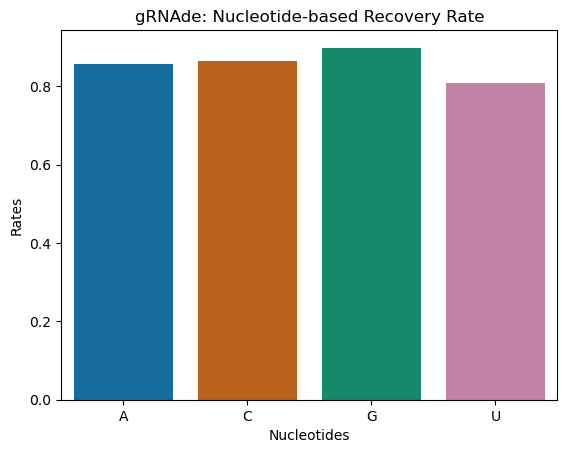

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

nucleotides = list(recovery_rate.keys())
rates = list(recovery_rate.values())

# Create the bar plot
colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7']
sns.barplot(x=nucleotides, y=rates, palette=colors)


# Add labels and title
plt.xlabel('Nucleotides')
plt.ylabel('Rates')
plt.title('gRNAde: Nucleotide-based Recovery Rate')

# Show the plot
plt.show()

## Recovery rate & free energy

In [36]:
import pickle

with open('minimum_free_energy.pkl', 'rb') as f:
    free_energy = pickle.load(f)

In [46]:
rcv_list = []
energy_list = []

for seq, dt in results.items():
    try:
        energy_list.append(free_energy[seq_to_file_map[seq]])
        rcv_list.append(dt['recovery_avg'])
    except:
        print(seq)

GGAGUAGCGCAGCCCGGUAGCGCACCUCGUUCGGGACGAGGGGGGCGCUGGCAGAUCCAGUCUCC


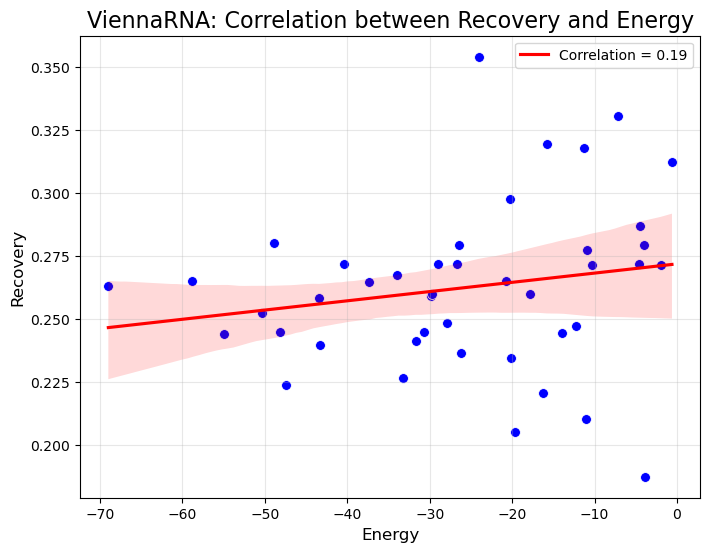

In [47]:
from scipy.stats import pearsonr

energy_list, rcv_list = zip(*sorted(zip(energy_list, rcv_list)))
correlation, _ = pearsonr(energy_list, rcv_list)
data = {
    'id': list(range(len(energy_list))),
    'energy': energy_list,
    'recovery': rcv_list
}
df_min = pd.DataFrame(data=data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="energy", y="recovery", data=df_min, color="blue", s=50)
sns.regplot(x="energy", y="recovery", data=df_min, scatter=False, color="red", label=f"Correlation = {correlation:.2f}")
plt.title("ViennaRNA: Correlation between Recovery and Energy", fontsize=16)
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Recovery", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()